## DrugBank Data Exploration 

In [1]:
import pandas as pd
import re

In [2]:
drug_dir = 'data/drugbank/'

#### Drugs ids with names

In [17]:
drugs = pd.read_csv(drug_dir + 'drug_id_name_map.csv', index_col=[0])
drugs.head()

,id,drug_name
1,DB00001,Lepirudin
2,DB00002,Cetuximab
3,DB00003,Dornase alfa
4,DB00004,Denileukin diftitox
5,DB00005,Etanercept


In [9]:
drugs.shape

(14594, 2)

In [4]:
num_drugs = len(drugs.id)
print(f'Number of drugs in dataset is {num_drugs}')

Number of drugs in dataset is 14594


#### Drug's categories

In [5]:
categories = pd.read_csv(drug_dir + 'drug_category.csv', index_col=[0]).dropna()
categories.head()
# mesh-id - The Medical Subjects Headings (MeSH) identifier for the category

,mesh_id,category
1,D000602,"Amino Acids, Peptides, and Proteins"
2,D000925,Anticoagulants
3,D058833,Antithrombin Proteins
4,D000991,Antithrombins
6,D002317,Cardiovascular Agents


In [6]:
categories.groupby('category').count()

,mesh_id
category,
11-Hydroxycorticosteroids,16
14-alpha Demethylase Inhibitors,8
17-Hydroxycorticosteroids,17
17-Ketosteroids,17
2-Chloroadenosine,1
...,...
meta-Aminobenzoates,3
ortho-Aminobenzoates,8
p38 Mitogen-Activated Protein Kinases,1


#### Drugs classification

In [4]:
drug_class = pd.read_csv(drug_dir + 'drug_classification.csv', index_col=[0])

In [4]:
drug_class.head()

,id,kingdom,superclass,class,subclass,substituent
1,DB00001,Organic Compounds,Organic Acids,Carboxylic Acids and Derivatives,"Amino Acids, Peptides, and Analogues",NaN
2,DB00002,Organic Compounds,Organic Acids,Carboxylic Acids and Derivatives,"Amino Acids, Peptides, and Analogues",NaN
3,DB00003,Organic Compounds,Organic Acids,Carboxylic Acids and Derivatives,"Amino Acids, Peptides, and Analogues",NaN
4,DB00004,Organic Compounds,Organic Acids,Carboxylic Acids and Derivatives,"Amino Acids, Peptides, and Analogues",NaN
5,DB00005,Organic Compounds,Organic Acids,Carboxylic Acids and Derivatives,"Amino Acids, Peptides, and Analogues",NaN


In [7]:
set(drug_class['class'])

{"(3'->5')-dinucleotides and analogues",
 "(5'->5')-dinucleotides",
 "2',3'-dideoxy-3'-thionucleoside monophosphates",
 "2',5'-dideoxyribonucleosides",
 '2-arylbenzofuran flavonoids',
 "5'-deoxyribonucleosides",
 '6,7-benzomorphans',
 'Acyl halides',
 'Ajmaline-sarpagine alkaloids',
 'Alkali metal organides',
 'Alkali metal oxoanionic compounds',
 'Alkali metal salts',
 'Alkaline earth metal organides',
 'Alkaline earth metal oxoanionic compounds',
 'Alkaline earth metal salts',
 'Alkyl halides',
 'Allocolchicine alkaloids',
 'Allyl-type 1,3-dipolar organic compounds',
 'Amaryllidaceae alkaloids',
 'Anthracenes',
 'Anthracyclines',
 'Aporphines',
 'Aryl halides',
 'Aryltetralin lignans',
 'Aurone flavonoids',
 'Azaspirodecane derivatives',
 'Azepanes',
 'Azepines',
 'Azetidines',
 'Azobenzenes',
 'Azoles',
 'Azolidines',
 'Azolines',
 'Benzazepines',
 'Benzene and substituted derivatives',
 'Benzimidazole ribonucleosides and ribonucleotides',
 'Benzimidazoles',
 'Benzisoxazoles',
 'Ben

In [8]:
drug_class.groupby('subclass').count()

,id,kingdom,superclass,class,substituent
subclass,,,,,
(3'->5')-dinucleotides,5,5,5,5,5
"1,2-oxazinanes",1,1,1,1,1
"1,3,5-triazinanes",2,2,2,2,2
"1,3,5-triazines",2,2,2,2,2
"1,3-diazepanes",1,1,1,1,1
...,...,...,...,...,...
Vinyl bromides,1,1,1,1,1
Vinyl chlorides,1,1,1,1,1
Vitamin D and derivatives,19,19,19,19,19


#### Drugs interactions

In [8]:
interactions = pd.read_csv(drug_dir + 'drug_interactions.csv', index_col=[0])

In [9]:
interactions.head()

,id,interacted_drug_name,description
1,DB06605,Apixaban,Apixaban may increase the anticoagulant activi...
2,DB06695,Dabigatran etexilate,Dabigatran etexilate may increase the anticoag...
3,DB01254,Dasatinib,The risk or severity of bleeding and hemorrhag...
4,DB01609,Deferasirox,The risk or severity of gastrointestinal bleed...
5,DB01586,Ursodeoxycholic acid,The risk or severity of bleeding and bruising ...


In [17]:
print(interactions.description[3])

The risk or severity of bleeding and hemorrhage can be increased when Dasatinib is combined with Lepirudin.


#### Drugs mixtures

In [13]:
mixtures = pd.read_csv(drug_dir + 'drug_mixtures.csv', index_col=[0])

In [14]:
mixtures.head()

,drug_name,ingredients
1,Refludan,Lepirudin
2,Erbitux,Cetuximab
3,Pulmozyme,Dornase alfa
4,Pulmozyme 1mg/ml,Dornase alfa
5,Ontak,Denileukin diftitox


#### Drug InChi key

In [15]:
inchi_key = pd.read_csv(drug_dir + 'drug_inchi_key.csv', index_col=[0])
inchi_key.head()

,id,inchi_key
1,DB00006,OIRCOABEOLEUMC-GEJPAHFPSA-N
2,DB00007,GFIJNRVAKGFPGQ-LIJARHBVSA-N
3,DB00014,BLCLNMBMMGCOAS-URPVMXJPSA-N
4,DB00027,NDAYQJDHGXTBJL-MWWSRJDJSA-N
5,DB00035,NFLWUMRGJYTJIN-PNIOQBSNSA-N


#### Drug molecules

In [16]:
molecules = pd.read_csv(drug_dir + 'drug_molecul.csv', index_col=[0])
molecules.head()

,id,molecule
1,DB00001,C287H440N80O110S6
2,DB00002,C6484H10042N1732O2023S36
3,DB00003,C1321H1999N339O396S9
4,DB00004,C2560H4042N678O799S17
5,DB00005,C2224H3475N621O698S36


#### Drug salts

In [17]:
salts = pd.read_csv(drug_dir + 'drug_salts.csv', index_col=[0])
salts.head()

,id,name,cas_number,inchi_key,drug
1,DBSALT000105,Leuprolide acetate,74381-53-6,YFDMUNOZURYOCP-XNHQSDQCSA-N,DB00007
2,DBSALT003182,Leuprolide mesylate,944347-41-5,MBIDSOMXPLCOHS-XNHQSDQCSA-N,DB00007
3,DBSALT001439,Sermorelin acetate,114466-38-5,NaN,DB00010
4,DBSALT000093,Goserelin acetate,145781-92-6,IKDXDQDKCZPQSZ-JHYYTBFNSA-N,DB00014
5,DBSALT001733,Insulin human zinc suspension,NaN,NaN,DB00030


### Food interactions 

In [3]:
food_interactions = pd.read_csv(drug_dir + 'drug_food_interactions.csv', index_col=[0])

In [4]:
food_interactions.head()

,id,description
1,DB00001,Avoid herbs and supplements with anticoagulant...
2,DB00006,Avoid echinacea.
3,DB00006,Avoid herbs and supplements with anticoagulant...
4,DB00008,Drink plenty of fluids.
5,DB00009,Avoid herbs and supplements with anticoagulant...


In [5]:
print('Number of all interactions:', food_interactions.shape[0])

Number of all interactions: 2422


In [6]:
list(food_interactions.description.values)[:5]

['Avoid herbs and supplements with anticoagulant/antiplatelet activity. Examples include garlic, ginger, bilberry, danshen, piracetam, and ginkgo biloba.',
 'Avoid echinacea.',
 'Avoid herbs and supplements with anticoagulant/antiplatelet activity. Examples include garlic, ginger, bilberry, danshen, piracetam, and ginkgo biloba.',
 'Drink plenty of fluids.',
 'Avoid herbs and supplements with anticoagulant/antiplatelet activity. Examples include garlic, ginger, bilberry, danshen, piracetam, and ginkgo biloba.']

In [7]:
# verbs: avoid, eat, drink, limit, (administer) requier/should take/should ingest, take (with), Exercise caution, should not be given with

In [8]:
descriptions = [
    'Avoid herbs and supplements with anticoagulant/antiplatelet activity. Examples include garlic, ginger, bilberry, danshen, piracetam, and ginkgo biloba.',
    'Administer calcium supplement. Individuals who are taking salmon calcitonin for the treatment of postmenopausal osteoporosis should ingest at least 1000mg of elemental calcium daily (by food or through supplementation).',
    'Administer vitamin supplements. Administer Vitamin D supplements to minimize the risk of bone mineral density loss.',
    'Drink plenty of fluids.',
    'Limit caffeine intake. Peginterferon alfa-2b can increase the serum levels of caffeine by inhibiting its metabolism through the CYP1A2 pathway.',
    'Take with fluids.',
    'Take at the same time every day. Take consistently with regard to food.',
    'Take on an empty stomach. The oral capsules should be taken on an empty stomach. Food reduces oral octreotide absorption by 90%.',
    'Take with or without food. A high-fat, high-calorie meal may increase the AUC and Cmax of calcifediol by up to 3.5 and 5 fold, respectively.',
    'Exercise caution with grapefruit products. Grapefruit inhibits CYP3A4 metabolism, which may increase the serum concentration of bortezomib.',
    'No food interactions are expected.',
    'Take separate from antacids. Take at least 2 hours before or after antacids.'
    'Take after a meal. Food reduces gastric irritation.',
    'Avoid alcohol. Consuming alcohol increases the risk of gastrointestinal irritation.'
]


In [9]:
DFI_1 = re.compile('Avoid (?P<food>.*)$')
DFI_2 = re.compile('Administer (?P<food>.*)')
DFI_3 = re.compile('Drink plenty of (?P<food>.*)')
DFI_4 = re.compile('Limit (?P<food>.*) intake')
DFI_5 = re.compile('Take with (?P<food>.*)')
DFI_6 = re.compile('Exercise caution with (?P<food>.*)')
DFI_7 = re.compile('Take separate from (?P<food>.*)')

patterns = [DFI_1, DFI_2, DFI_3, DFI_4, DFI_5, DFI_6, DFI_7]
patterns_dict = { DFI_1: 'avoid', DFI_2: 'increase_intake', DFI_3: 'increase_intake', DFI_4: 'limit', 
                 DFI_5: 'take_with', DFI_6: 'avoid', DFI_7: 'avoid'}

def parse_food_interaction(desc):
    interaction_type = ''
    food = ''
   
    for pattern in patterns:
        desc = desc.split('. ')[0]
        desc = re.sub('\.', '', desc)
        desc = re.sub('\ \(eg', '', desc)
        pg = re.match(pattern, desc)
        if pg is not None:
            interaction_type = patterns_dict[pattern]
            food = pg.group("food").lower() 
            continue
   
    return interaction_type, food            

In [12]:
food_interactions_list = list(food_interactions.description.values)

parsed_food_interactions = []

for desc in food_interactions_list:
    interaction, food = parse_food_interaction(desc)
    if len(interaction) > 0:
        parsed_food_interactions.append((interaction, food))
    

print(len(parsed_food_interactions))
print(parsed_food_interactions[0])

2136
('avoid', 'herbs and supplements with anticoagulant/antiplatelet activity')


In [19]:
pattern_interaction_map = {'avoid': 'decrease_effectiveness', 
                            'limit': 'decrease_effectiveness', 
                            'take_with': 'increase_effectiveness',
                            'increase_intake': 'decrease_adverse_effects',
                            'increase_antiplatelet_activities': 'increase_antiplatelet_activities'}

In [27]:
drugs_list = []
food_list = []
interactions = []

for inter in food_interactions.itertuples():
    drug = drugs[drugs['id'] == inter[1]].values[0][1]
    desc = inter[2]

    interaction, food = parse_food_interaction(desc)

    if len(interaction) > 0 and interaction != 'nothing' and food != 'or without food':
        if 'anticoagulant/antiplatelet activity' in food:
            interaction = 'increase_antiplatelet_activities' 
             
        elif food == 'st':
            food = "St. John's Wort"
            
        elif 'alcohol' in food:
            food = "alcohol"
           
        elif 'water' in food or 'fluids' in food:
            food = "water"
           
        elif 'grapefruit' in food:
            food = "grapefruit"

        elif 'potassium' in food:
            food = 'potassium'

        elif 'calcium' in food:
            food = 'calcium'

        elif 'dairy' in food:
            food = 'dairy products'    
           
        interaction = pattern_interaction_map[interaction]

        drugs_list.append(drug)
        food_list.append(food)  
        interactions.append(interaction)

food_interactions_triplets = pd.DataFrame({'drug': drugs_list, 'interaction': interactions, 'food': food_list})

        

In [28]:
# with open('data/food-ineter.txt', 'w') as f:
#     for line in list(food_interactions_triplets.food):
#         f.write(line + "\n")

In [29]:
food_interactions_triplets 

,drug,interaction,food
0,Lepirudin,increase_antiplatelet_activities,herbs and supplements with anticoagulant/antip...
1,Bivalirudin,decrease_effectiveness,echinacea
2,Bivalirudin,increase_antiplatelet_activities,herbs and supplements with anticoagulant/antip...
3,Peginterferon alfa-2a,decrease_adverse_effects,water
4,Alteplase,increase_antiplatelet_activities,herbs and supplements with anticoagulant/antip...
...,...,...,...
1563,Finerenone,decrease_effectiveness,grapefruit
1564,Odevixibat,increase_effectiveness,a high fat meal
1565,Mobocertinib,decrease_effectiveness,St. John's Wort
1566,Nirmatrelvir,decrease_effectiveness,St. John's Wort


## Drug ingredients exploration

In [8]:
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
drug_ingredients = pd.read_csv('data/triplets/ingredients.tsv', sep='\t', index_col=[0])
ingredients = drug_ingredients.ingredient
print(f'Number of unique ingredients: {len(set(ingredients))}')

Number of unique ingredients: 6544


In [4]:
ingredients = [x.strip().lower() for x in ingredients]
ingredients[:10]

['lepirudin',
 'cetuximab',
 'dornase alfa',
 'dornase alfa',
 'denileukin diftitox',
 'etanercept',
 'etanercept',
 'etanercept',
 'etanercept',
 'etanercept']

In [5]:
counts = Counter(ingredients)
counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
counts_ingredients_df = pd.DataFrame(counts.items(), columns=['compound', 'frequency'])
counts_ingredients_df.head()

,compound,frequency
0,octinoxate,12394
1,ethanol,12236
2,titanium dioxide,8898
3,octisalate,8036
4,zinc oxide,6970


<AxesSubplot: xlabel='compound'>

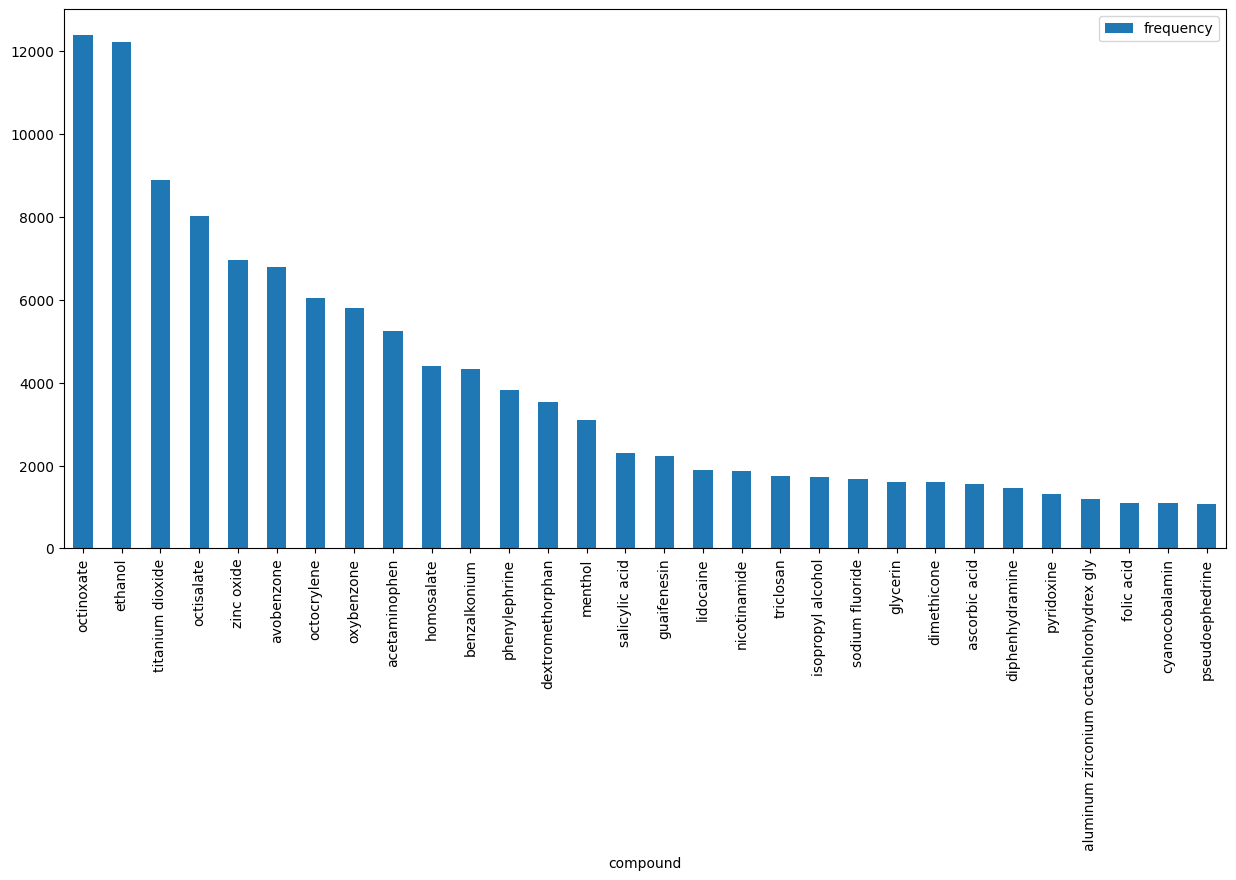

In [31]:
counts_ingredients_df = counts_ingredients_df.head(60)
counts_ingredients_df.plot.bar(x='compound', y='frequency', figsize=(15, 7))


### Typical compounds in interacting drugs

In [32]:
ddi = pd.read_csv("data/triplets/ddi.tsv", sep='\t', index_col=[0])

In [33]:
drug_compound_dict = dict()
interacting_drugs = set(ddi.drug1)
interacting_drugs.union(set(ddi.drug2))

for d in interacting_drugs:
    drug_compound_dict[d] = list(drug_ingredients[drug_ingredients['drug_name'] == d].ingredient)
        
drug_compound_dict['Galantamine']

['Galantamine']

In [34]:
inspected_drugs = []
typical_compounds = []

for row in ddi.itertuples():
    drug1 = row[1]
    effect = row[2]
    drug2 = row[3]

    if drug2 in inspected_drugs or drug1 in inspected_drugs:
        continue

    inspected_drugs.append(drug2)
  
    drug2_ingredients = drug_compound_dict.get(drug2)
    drug1_ingredients = drug_compound_dict.get(drug1)
    
    if drug1_ingredients is not None:
        typical_compounds += drug1_ingredients
    
    if drug2_ingredients is not None:
        typical_compounds += drug2_ingredients
        
typical_compounds        

['Apixaban',
 'Apixaban',
 'Bivalirudin',
 'Apixaban',
 'Cyclophosphamide',
 'Apixaban',
 'Apixaban',
 'Cyclophosphamide',
 'Citalopram',
 'Cyclophosphamide',
 'Bleomycin',
 'Dexamethasone',
 'Aminocaproic acid',
 'Apixaban',
 'Apixaban',
 'Carbamazepine',
 'Desmopressin',
 'Tramadol',
 'Glucagon',
 'Loxapine',
 'Insulin lispro',
 'Prilocaine',
 'Cilostazol',
 'Prednisone',
 'Ethanol ',
 ' Prednisone',
 'Apixaban',
 'Apixaban',
 'Zolmitriptan',
 'Pentostatin',
 'Apixaban',
 'Eptifibatide',
 'Infliximab',
 'Fluvoxamine',
 'Vasopressin',
 'Lorazepam',
 'Ranolazine',
 'Daptomycin',
 'Pancrelipase amylase ',
 ' Pancrelipase lipase ',
 ' Pancrelipase protease',
 'Apixaban',
 'Pimecrolimus',
 'Cyclosporine',
 'Bleomycin',
 'Aminocaproic acid',
 'Chloroquine',
 'Octreotide',
 'Oxytocin',
 'Ritonavir',
 'Chloramphenicol',
 'Cyanocobalamin',
 '8-epi-Cyanocobalamin',
 'Fosphenytoin',
 'Enflurane',
 'Bupropion',
 'Nicotine',
 'Nicotine ',
 ' Nicotine',
 'Lactulose',
 'Calcitriol',
 'Digoxin',
 'G

In [35]:
typical_compounds = [x.strip().lower() for x in typical_compounds]

In [38]:
counts_typical_compounds = Counter(typical_compounds)
counts_typical_compounds = dict(sorted(counts_typical_compounds.items(), key=lambda item: item[1], reverse=True))
counts_typical_compounds_df = pd.DataFrame(counts_typical_compounds.items(), columns=['compound', 'frequency'])
counts_typical_compounds_df.head()

,compound,frequency
0,buprenorphine,72
1,apixaban,56
2,deferasirox,55
3,hyaluronidase (human recombinant),41
4,duloxetine,32


<AxesSubplot: xlabel='compound'>

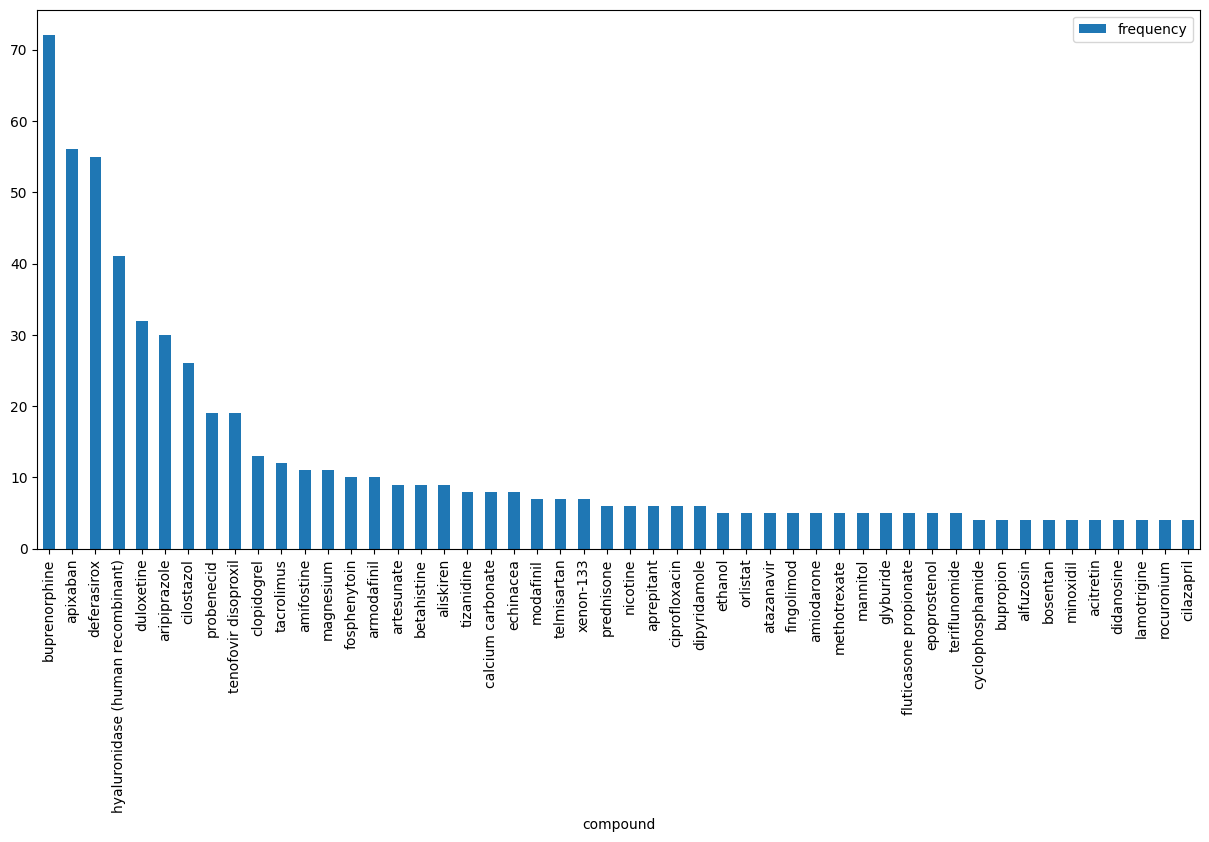

In [40]:
counts_typical_compounds_df = counts_typical_compounds_df.head(50)
counts_typical_compounds_df.plot.bar(x='compound', y='frequency', figsize=(15, 7))